In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
iris1 = pd.read_csv('iris.csv')
iris1

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
# etiquetas de las columnas

etiquetas = iris1['variety']
etiquetas

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [4]:
from numpy import array
from sklearn.decomposition import TruncatedSVD

A=iris1
# Remover la columna de variedad (no es numérica)
A = A.drop('variety', axis=1)
A

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
from numpy import diag
from numpy import zeros
from scipy.linalg import svd # (Singular Value Decomposition)

In [6]:
U, s, VT = svd(A)  # Obtención de matrices cuyo producto es A
# Construcción de la matriz Sigma
# creación de matriz de ceros de la misma dimensión que A
Sigma = zeros((A.shape[0], A.shape[1]))
Sigma[:A.shape[1], :A.shape[1]] = diag(s)  # Llenado de la diagonal con los valores singulares Llenado de la diagonal con los valores singulares

In [7]:
print('Matriz : U')
print(U)

Matriz : U
[[-0.06161685  0.12961144  0.0021386  ... -0.09343429 -0.09573864
  -0.08085465]
 [-0.05807094  0.11101978  0.07067239 ...  0.03690405 -0.03153954
   0.01309526]
 [-0.05676305  0.11796647  0.00434255 ...  0.03066199  0.19531473
   0.13569909]
 ...
 [-0.0940593  -0.0498297  -0.04144001 ...  0.98181631 -0.02194514
  -0.00894446]
 [-0.09488961 -0.05610123 -0.21297821 ... -0.02155617  0.94178018
  -0.02971961]
 [-0.08847836 -0.0515697  -0.09575285 ... -0.0086052  -0.03021088
   0.9736599 ]]


In [8]:
print('Matriz : Sigma')
print(Sigma)

Matriz : Sigma
[[95.95991387  0.          0.          0.        ]
 [ 0.         17.76103366  0.          0.        ]
 [ 0.          0.          3.46093093  0.        ]
 [ 0.          0.          0.          1.88482631]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0

In [9]:
print('Matriz : VT') # VT es la matriz transpuesta de V
print(VT)

Matriz : VT
[[-0.75110816 -0.38008617 -0.51300886 -0.16790754]
 [ 0.2841749   0.5467445  -0.70866455 -0.34367081]
 [ 0.50215472 -0.67524332 -0.05916621 -0.53701625]
 [ 0.32081425 -0.31725607 -0.48074507  0.75187165]]


In [10]:
# Para reconstruir la matriz original A, 
# se realiza la multiplicación de las tres matrices obtenidas
B = U.dot(Sigma.dot(VT))
print(B)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [11]:
# Reducción de la dimensionalidad a dos dimensiones

n = 2

UReduced = U[:, :n]
print('Matriz U reducida')
print(UReduced)

Matriz U reducida
[[-6.16168450e-02  1.29611444e-01]
 [-5.80709402e-02  1.11019776e-01]
 [-5.67630474e-02  1.17966465e-01]
 [-5.66534426e-02  1.05308145e-01]
 [-6.12302023e-02  1.31089790e-01]
 [-6.75031684e-02  1.30884835e-01]
 [-5.74820774e-02  1.16598182e-01]
 [-6.09726328e-02  1.20943120e-01]
 [-5.37611959e-02  9.99414853e-02]
 [-5.88266594e-02  1.12043088e-01]
 [-6.52918230e-02  1.36578094e-01]
 [-5.99417779e-02  1.13753142e-01]
 [-5.71132323e-02  1.11354756e-01]
 [-5.15957540e-02  1.15324791e-01]
 [-6.80071908e-02  1.64183057e-01]
 [-7.07625894e-02  1.59056485e-01]
 [-6.53647385e-02  1.46844820e-01]
 [-6.17918218e-02  1.27676473e-01]
 [-6.92802967e-02  1.34541441e-01]
 [-6.35146947e-02  1.32921488e-01]
 [-6.51727724e-02  1.19363091e-01]
 [-6.32935829e-02  1.27908181e-01]
 [-5.59608478e-02  1.40649812e-01]
 [-6.29534207e-02  1.05679869e-01]
 [-6.15456003e-02  1.01783154e-01]
 [-5.99228863e-02  1.04639775e-01]
 [-6.18571938e-02  1.13083182e-01]
 [-6.29341837e-02  1.27221439e-01]
 [

In [12]:
SigmaReduced = Sigma[:n, :n]
print('Matriz Sigma reducida')
print(SigmaReduced)

Matriz Sigma reducida
[[95.95991387  0.        ]
 [ 0.         17.76103366]]


In [13]:
VTReduced = VT[:n, :]
print('Matriz VT reducida')
print(VTReduced)

Matriz VT reducida
[[-0.75110816 -0.38008617 -0.51300886 -0.16790754]
 [ 0.2841749   0.5467445  -0.70866455 -0.34367081]]


In [14]:
Areduced = UReduced.dot(SigmaReduced.dot(VTReduced))
print('Matriz A Transformada')
print(Areduced)

Matriz A Transformada
[[5.0952927  3.50597743 1.40192232 0.20165319]
 [4.74588049 3.19610853 1.46136967 0.25800276]
 [4.68667405 3.21586325 1.30954904 0.19452725]
 [4.61488457 3.08894388 1.46347879 0.27002699]
 [5.07488651 3.50623125 1.36428119 0.1863997 ]
 [5.52598407 3.7330351  1.67566825 0.28872322]
 [4.731593   3.2288014  1.36216771 0.21446447]
 [5.00510918 3.39830515 1.47931372 0.24418439]
 [4.37933538 2.93134058 1.38864652 0.25618379]
 [4.80551481 3.23360903 1.48569239 0.26393296]
 [5.39533378 3.70766642 1.49514864 0.2183418 ]
 [4.89451945 3.29088668 1.51906398 0.27146211]
 [4.67854319 3.16443092 1.41000708 0.24052709]
 [4.30090163 3.00174374 1.08842179 0.12739443]
 [5.73037625 4.07476895 1.2813685  0.09359359]
 [5.90310008 4.12548386 1.48153824 0.16928199]
 [5.45240789 3.81002345 1.36951483 0.15684908]
 [5.09813811 3.49356935 1.43489086 0.21628344]
 [5.67252863 3.83336074 1.71712893 0.29503728]
 [5.24878923 3.60734078 1.45368795 0.21202774]
 [5.29986481 3.53615373 1.70596661 0.3

In [15]:
T2 = UReduced.dot(SigmaReduced)
print('Matriz T(2 Dimensiones)')
print(T2)

Matriz T(2 Dimensiones)
[[-5.91274714e+00  2.30203322e+00]
 [-5.57248242e+00  1.97182599e+00]
 [-5.44697714e+00  2.09520636e+00]
 [-5.43645948e+00  1.87038151e+00]
 [-5.87564494e+00  2.32829018e+00]
 [-6.47759822e+00  2.32464996e+00]
 [-5.51597520e+00  2.07090423e+00]
 [-5.85092859e+00  2.14807482e+00]
 [-5.15891972e+00  1.77506408e+00]
 [-5.64500117e+00  1.99000106e+00]
 [-6.26539771e+00  2.42576813e+00]
 [-5.75200785e+00  2.02037338e+00]
 [-5.48058085e+00  1.97777558e+00]
 [-4.95112411e+00  2.04828749e+00]
 [-6.52596417e+00  2.91606081e+00]
 [-6.79037199e+00  2.82500759e+00]
 [-6.27239468e+00  2.60811578e+00]
 [-5.92953789e+00  2.26766614e+00]
 [-6.64813130e+00  2.38959506e+00]
 [-6.09486463e+00  2.36082303e+00]
 [-6.25397363e+00  2.12001187e+00]
 [-6.07364677e+00  2.27178150e+00]
 [-5.36999813e+00  2.49808604e+00]
 [-6.04100482e+00  1.87698371e+00]
 [-5.90591050e+00  1.80777402e+00]
 [-5.75019501e+00  1.85851056e+00]
 [-5.93581099e+00  2.00847420e+00]
 [-6.03915884e+00  2.25958425e+

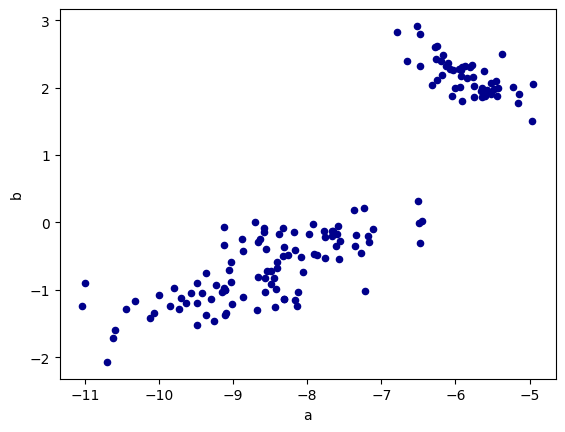

In [16]:
df2 = pd.DataFrame(data = T2, columns = ['a', 'b'])
df2.plot.scatter(x='a', y='b', c='DarkBlue')
plt.show()

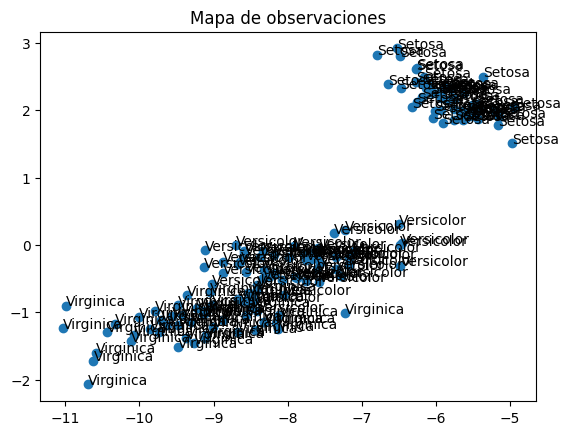

In [17]:
df2 = pd.DataFrame(T2, columns = ['a', 'b'])
x = df2.iloc[:,0]
y = df2.iloc[:,1]
x = x.to_numpy()
y = y.to_numpy()

fig, ax = plt.subplots()
ax.set_title('Mapa de observaciones')
ax.scatter(x, y)

for i, txt in enumerate(etiquetas):
    ax.annotate(txt, (x[i], y[i]))
plt.show()

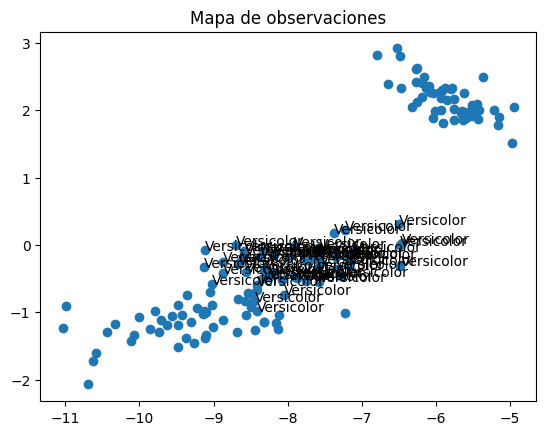

In [18]:
# visualizar el mapa de observaciones con etiquetas de la variedad
# solo para la variedad Versicolor
df2 = pd.DataFrame(T2, columns = ['a', 'b'])
x = df2.iloc[:,0]
y = df2.iloc[:,1]
x = x.to_numpy()
y = y.to_numpy()

fig, ax = plt.subplots()
ax.set_title('Mapa de observaciones')
ax.scatter(x, y)

for i, txt in enumerate(etiquetas):
    if txt == 'Versicolor':
        ax.annotate(txt, (x[i], y[i]))
    
plt.show()

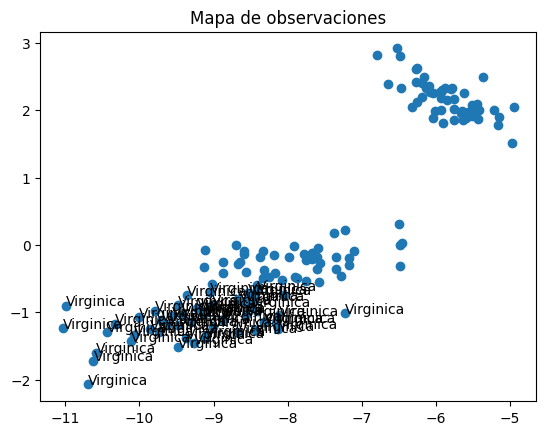

In [19]:
# visualizar el mapa de observaciones con etiquetas de la variedad
# solo para la variedad Virginica
df2 = pd.DataFrame(T2, columns = ['a', 'b'])
x = df2.iloc[:,0]
y = df2.iloc[:,1]
x = x.to_numpy()
y = y.to_numpy()

fig, ax = plt.subplots()
ax.set_title('Mapa de observaciones')
ax.scatter(x, y)

for i, txt in enumerate(etiquetas):
    if txt == 'Virginica':
        ax.annotate(txt, (x[i], y[i]))
    
plt.show()

In [21]:
# Reducción de la dimensionalidad a tres dimensiones

n = 3

UReduced3 = U[:, :n]

SigmaReduced3 = Sigma[:n, :n]

VTReduced3 = VT[:n, :]

Areduced3 = UReduced3.dot(SigmaReduced3.dot(VTReduced3))
print('Matriz A Transformada')
print(Areduced3)

Matriz A Transformada
[[5.09900942 3.50097959 1.4014844  0.19767844]
 [4.86870364 3.03094925 1.44689807 0.12665275]
 [4.69422107 3.20571484 1.30865982 0.18645629]
 [4.62518119 3.0750981  1.4622656  0.25901553]
 [5.01947963 3.58073643 1.37080948 0.24565314]
 [5.40687172 3.89320449 1.68970262 0.41610481]
 [4.61617117 3.38400818 1.37576725 0.33789933]
 [5.01454656 3.38561478 1.47820176 0.23409183]
 [4.40998651 2.89012425 1.38503506 0.22340474]
 [4.91842577 3.08177859 1.4723887  0.14318329]
 [5.40391192 3.69613146 1.49413792 0.20916813]
 [4.8505539  3.3500068  1.5242442  0.31847992]
 [4.80311694 2.99691763 1.39532922 0.10730496]
 [4.30830887 2.99178329 1.08754903 0.11947296]
 [5.74700833 4.05240393 1.27940883 0.07580684]
 [5.69603935 4.40391672 1.5059351  0.39071768]
 [5.34517978 3.95421221 1.38214894 0.27152138]
 [5.07488831 3.52483318 1.43763026 0.24114734]
 [5.68993828 3.80995013 1.71507765 0.27641899]
 [5.12084537 3.77938583 1.46876289 0.34885395]
 [5.40422382 3.39582303 1.69367054 0.2

In [22]:
T3 = UReduced3.dot(SigmaReduced3)
print('Matriz T(3 Dimensiones)')
print(T3)

Matriz T(3 Dimensiones)
[[-5.91274714e+00  2.30203322e+00  7.40153559e-03]
 [-5.57248242e+00  1.97182599e+00  2.44592251e-01]
 [-5.44697714e+00  2.09520636e+00  1.50292625e-02]
 [-5.43645948e+00  1.87038151e+00  2.05048805e-02]
 [-5.87564494e+00  2.32829018e+00 -1.10338269e-01]
 [-6.47759822e+00  2.32464996e+00 -2.37202487e-01]
 [-5.51597520e+00  2.07090423e+00 -2.29853120e-01]
 [-5.85092859e+00  2.14807482e+00  1.87937744e-02]
 [-5.15891972e+00  1.77506408e+00  6.10392203e-02]
 [-5.64500117e+00  1.99000106e+00  2.24852923e-01]
 [-6.26539771e+00  2.42576813e+00  1.70826682e-02]
 [-5.75200785e+00  2.02037338e+00 -8.75537913e-02]
 [-5.48058085e+00  1.97777558e+00  2.48078403e-01]
 [-4.95112411e+00  2.04828749e+00  1.47509030e-02]
 [-6.52596417e+00  2.91606081e+00  3.31214244e-02]
 [-6.79037199e+00  2.82500759e+00 -4.12344488e-01]
 [-6.27239468e+00  2.60811578e+00 -2.13536004e-01]
 [-5.92953789e+00  2.26766614e+00 -4.63000893e-02]
 [-6.64813130e+00  2.38959506e+00  3.46698872e-02]
 [-6.09

In [ ]:
# cargar librerías para visualización en 3D

from mpl_toolkits import mplot3d
%matplotlib inline

In [24]:
df3 = pd.DataFrame(T3, columns = ['a', 'b', 'c'])
df3

,a,b,c
0,-5.912747,2.302033,0.007402
1,-5.572482,1.971826,0.244592
2,-5.446977,2.095206,0.015029
3,-5.436459,1.870382,0.020505
4,-5.875645,2.328290,-0.110338
...,...,...,...
145,-9.226517,-0.931293,-0.204095
146,-8.566265,-1.039134,0.159305
147,-9.025923,-0.885027,-0.143421
148,-9.105599,-0.996416,-0.737103


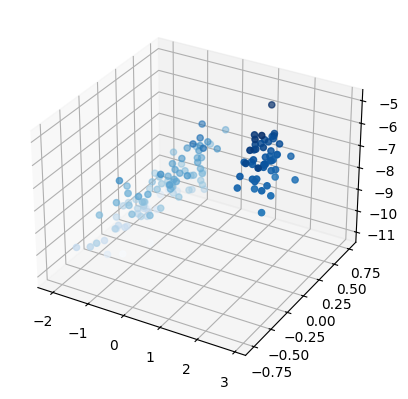

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xline = df3['b']
yline = df3['c']
zline = df3['a']
ax.scatter3D(xline, yline, zline, c=zline, cmap='Blues')

In [27]:
from mpl_toolkits.mplot3d import Axes3D

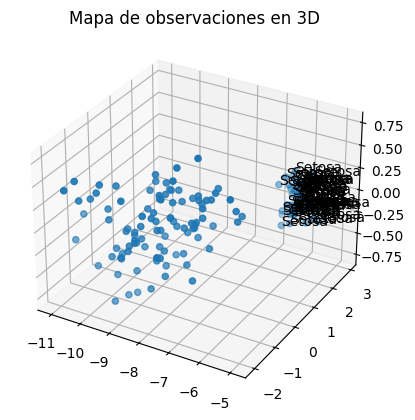

In [ ]:
# Gráfico de dispersión en 3D para setosa

ax3d = plt.figure().add_subplot(111, projection='3d')
arrayx = np.array(df3['a'])
arrayy = np.array(df3['b'])
arrayz = np.array(df3['c'])
ax3d.scatter(arrayx, arrayy, arrayz)
for x, y, z, label in zip(arrayx, arrayy, arrayz, etiquetas):
    if label == 'Setosa':
        ax3d.text(x, y, z, label)
plt.title('Mapa de observaciones en 3D')
plt.show()

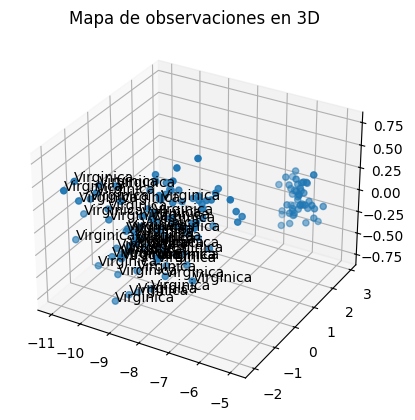

In [31]:
# Gráfico de dispersión en 3D para Virginica

ax3d = plt.figure().add_subplot(111, projection='3d')
arrayx = np.array(df3['a'])
arrayy = np.array(df3['b'])
arrayz = np.array(df3['c'])
ax3d.scatter(arrayx, arrayy, arrayz)
for x, y, z, label in zip(arrayx, arrayy, arrayz, etiquetas):
    if label == 'Virginica':
        ax3d.text(x, y, z, label)
plt.title('Mapa de observaciones en 3D')
plt.show()

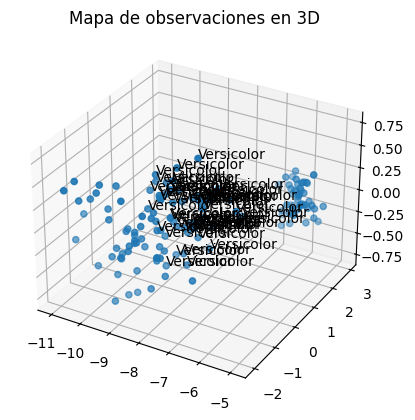

In [32]:
# Gráfico de dispersión en 3D para Versicolor

ax3d = plt.figure().add_subplot(111, projection='3d')
arrayx = np.array(df3['a'])
arrayy = np.array(df3['b'])
arrayz = np.array(df3['c'])
ax3d.scatter(arrayx, arrayy, arrayz)
for x, y, z, label in zip(arrayx, arrayy, arrayz, etiquetas):
    if label == 'Versicolor':
        ax3d.text(x, y, z, label)
plt.title('Mapa de observaciones en 3D')
plt.show()

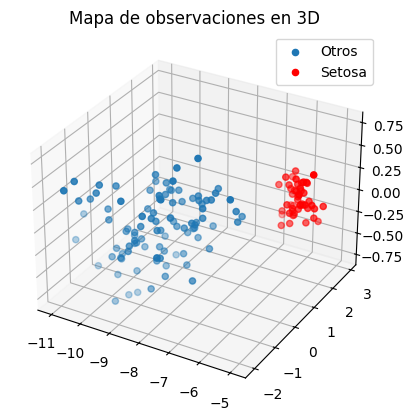

In [ ]:
# Graficando y separando las observaciones en 3D por variedad
# y coloreando las observaciones de 'Setosa' en rojo

ax3d = plt.figure().add_subplot(111, projection='3d')
arrayx = np.array(df3['a'])
arrayy = np.array(df3['b'])
arrayz = np.array(df3['c'])

# Crear una máscara para los puntos que corresponden a 'Setosa'
mask_setosa = np.array(etiquetas) == 'Setosa'

# Graficar los puntos que no son 'Setosa'
ax3d.scatter(arrayx[~mask_setosa], arrayy[~mask_setosa], arrayz[~mask_setosa], label='Otros')

# Graficar los puntos que son 'Setosa' en otro color
ax3d.scatter(arrayx[mask_setosa], arrayy[mask_setosa], arrayz[mask_setosa], color='r', label='Setosa')

plt.title('Mapa de observaciones en 3D')
plt.legend()
plt.show()

<Axes: >

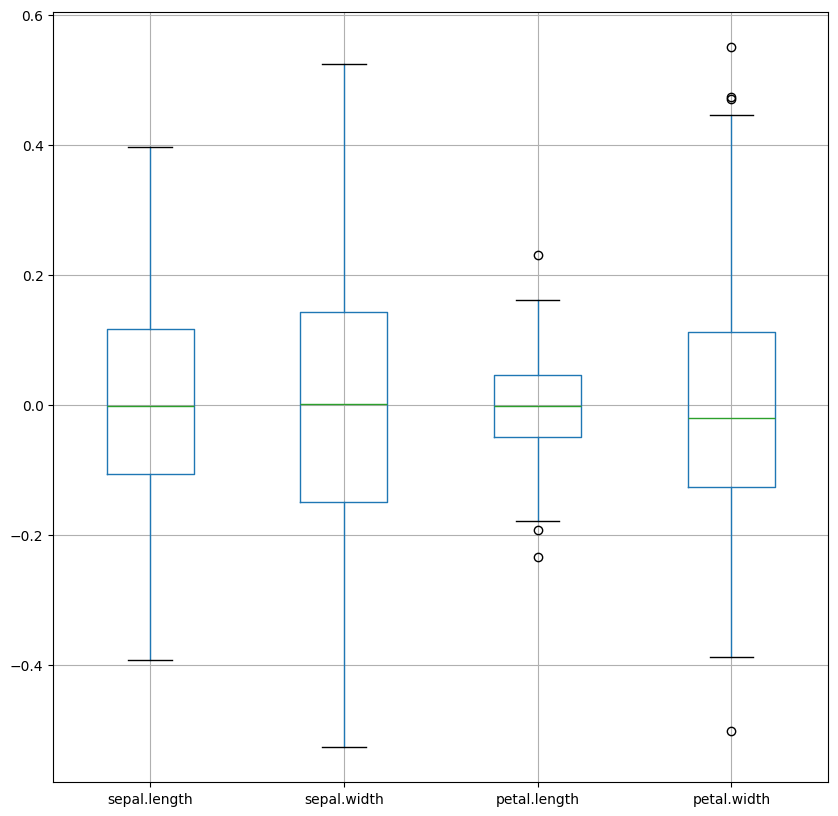

In [36]:
plt.figure( figsize=(10, 10))
error2 = B - Areduced
dferror2 = pd.DataFrame(error2, columns = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width'])
dferror2.boxplot()

In [37]:
print('Error promedio por columna')
error2.mean(axis=0)

Error promedio por columna


array([ 1.63686453e-03, -2.22711818e-03, -9.18095159e-05, -2.00030563e-03])

<Axes: >

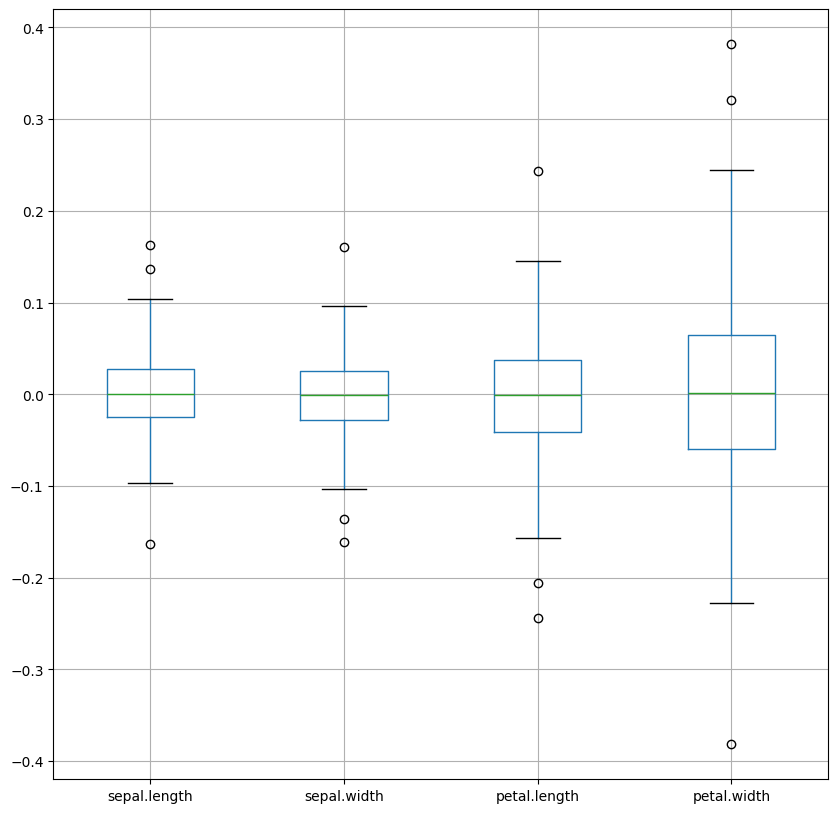

In [40]:
error3 = B - Areduced3

plt.figure( figsize=(10, 10))

dferror3 = pd.DataFrame(error3, columns = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width'])
dferror3.boxplot()

In [41]:
error3.mean(axis=0)

array([-7.31905331e-05,  7.23787682e-05,  1.09677133e-04, -1.71531926e-04])